In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

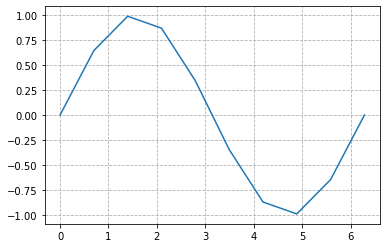

In [2]:
left_cord = 0
right_cord = 2*np.pi
amount_of_points = 10
distanse_between = (right_cord - left_cord)/(amount_of_points - 1)

func_x = np.linspace(left_cord, right_cord, amount_of_points)
func_y = np.sin(func_x)

plt.plot(func_x, func_y)
plt.grid(ls='--')
plt.show()

In [3]:
def cal_appr_der_1(y, h):
    df = np.array([(y[i + 1] - y[i])/h for i in range(y.shape[0] - 1)])
    df = np.append(df , (y[y.shape[0] - 1] - y[y.shape[0] - 2])/h)
    return df
    
def cal_appr_der_2(y, h):
    
    df = np.array([(-3 * y[i] + 4 * y[i+1] - y[i+2])/(2*h) for i in range(y.shape[0] - 2)])
    df = np.append(df, (3 * y[y.shape[0] - 2] - 4 * y[y.shape[0] - 3] + y[y.shape[0] - 4]) / (2 * h))
    df = np.append(df, (3 * y[y.shape[0] - 1] - 4 * y[y.shape[0] - 2] + y[y.shape[0] - 3]) / (2 * h))
    return df

# l2 norm 
def err_der_l2(df1, df2):
    return ((df1 - df2)**2).sum()

def err_der_l1(df1, df2):
    return (np.abs(df1 - df2)).sum()

def err_for_plot(left, right, border):
    distanse = (left + 10**(10)*border) - left
    arr_distanse = np.array([])
    arr_err = np.array([])
    
    while distanse >= border:
        arr_distanse = np.append(arr_distanse, distanse)
        x = np.arange(left, left + 11*distanse, distanse)
        y = np.sin(x)
        
        d1sin = np.cos(x)
        df_approx_1 = cal_appr_der_1(y, distanse)
        df_approx_2 = cal_appr_der_2(y, distanse)
        
        err_math = ((-1/2*np.sin(x + distanse/2)*distanse)**2).sum()
        err_real_approx_1 = err_der_l2(d1sin, df_approx_1)
        err_real_approx_2 = err_der_l2(d1sin, df_approx_2)
        
        arr_err = np.append(arr_err, [err_math, err_real_approx_1, err_real_approx_2])
        
        if distanse < 1:
            distanse /= 2.
        else :
            distanse -= 0.01
        
    return (arr_distanse, arr_err)     

In [4]:
d1sin = np.cos(func_x)
d2sin = - np.sin(func_x)
df_appr1 = cal_appr_der_1(func_y, distanse_between)
df_appr2 = cal_appr_der_2(func_y, distanse_between)

How you can see graphs similar

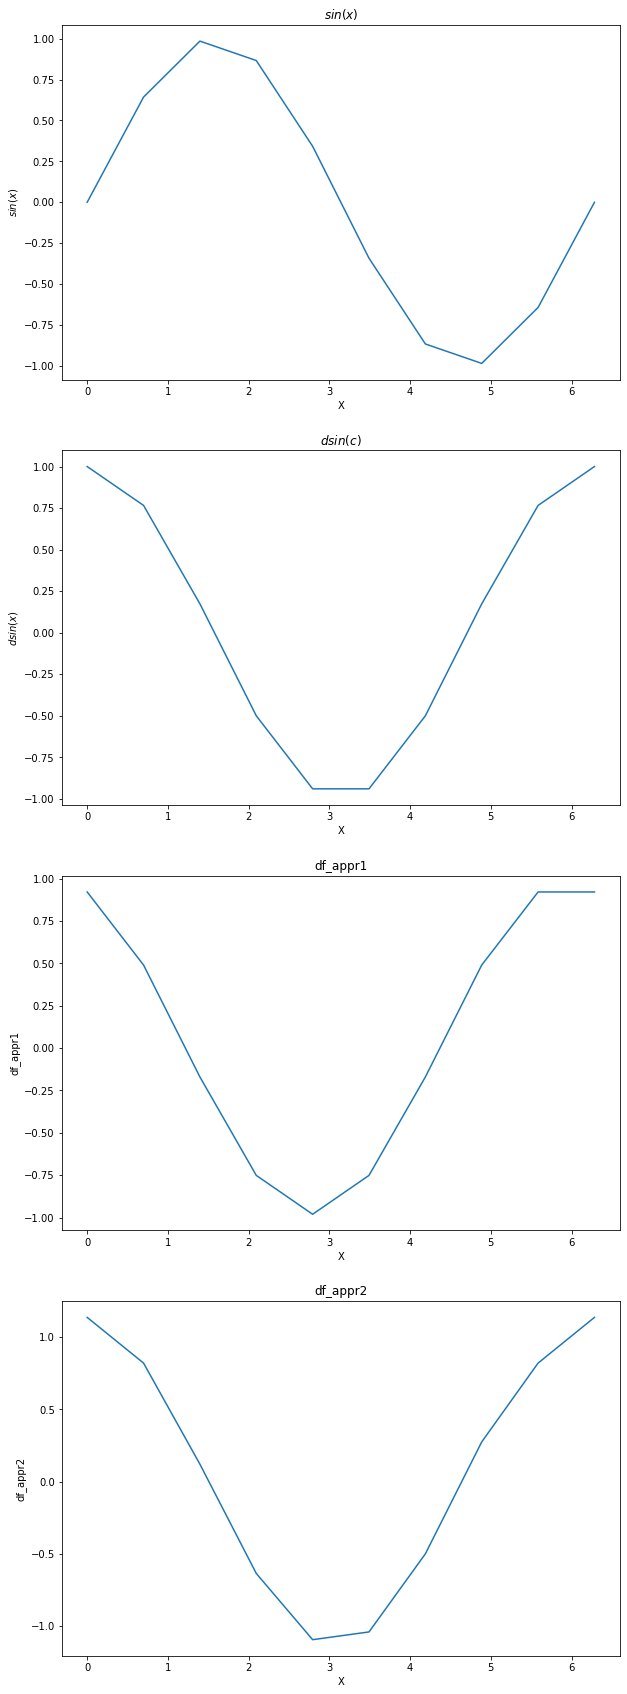

In [5]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 30))

ax[0].set_xlabel("X")
ax[1].set_xlabel("X")
ax[2].set_xlabel("X")
ax[3].set_xlabel("X")

ax[0].set_ylabel("$sin(x)$")
ax[1].set_ylabel("$dsin(x)$")
ax[2].set_ylabel("df_appr1")
ax[3].set_ylabel("df_appr2")

ax[0].set_title("$sin(x)$")
ax[1].set_title("$dsin(c)$")
ax[2].set_title("df_appr1")
ax[3].set_title("df_appr2")


ax[0].plot(func_x, func_y)
ax[1].plot(func_x, d1sin)
ax[2].plot(func_x, df_appr1)
ax[3].plot(func_x, df_appr2)

In [6]:
math_err_l2 = ((-1/2*np.sin(func_x + distanse_between/2)*distanse_between)**2).sum()
err_real_appr1 =  err_der_l2(d1sin, df_appr1)
err_real_appr2 =  err_der_l2(d1sin, df_appr2)


How You can see matimatic error coincides with first approximal error
And Second Approximal error much less than the first approximation 

I calculated the distance according to L2 norm 

$||f1 - f2||_2 =\sqrt{\sum_{i = 0}^{size} (f1 -f2)^2}$


In [7]:
print(math_err_l2, err_real_appr1, err_real_appr2)

0.5625647432324474 0.5399287780782785 0.10856796185386534


Now i want plot errors versus distanse_between
Let's start with find sccater for graph

In [8]:
arr_distanse, arr_err = err_for_plot(0, 2*np.pi, 10**(-15))
arr_err = arr_err.reshape((arr_distanse.shape[0], 3))
print("Number of scatter:")
print(arr_distanse.shape[0])

Number of scatter:
34


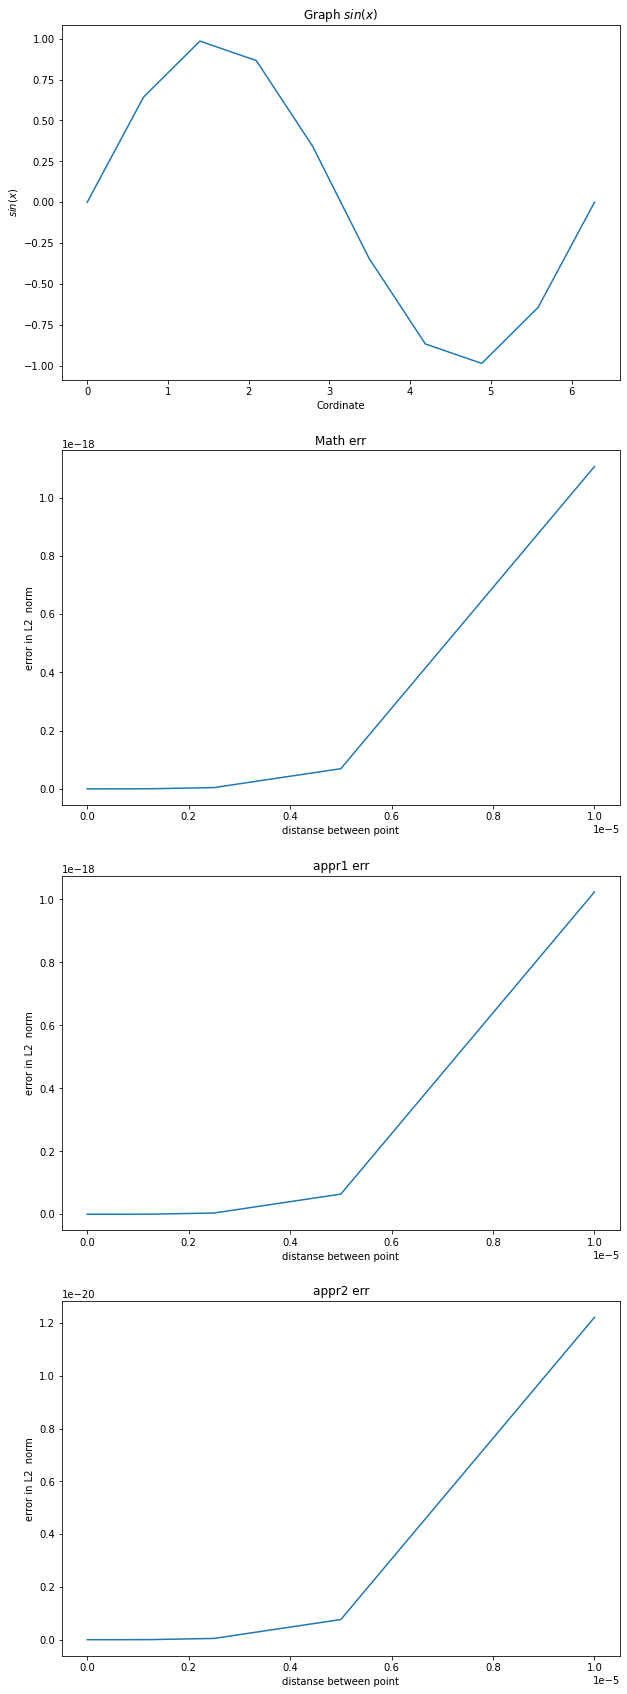

In [9]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 30))

ax[0].set_xlabel("Cordinate")
ax[1].set_xlabel("distanse between point")
ax[2].set_xlabel("distanse between point")
ax[3].set_xlabel("distanse between point")

ax[0].set_ylabel("$sin(x)$")
ax[1].set_ylabel("error in L2  norm")
ax[2].set_ylabel("error in L2  norm")
ax[3].set_ylabel("error in L2  norm")

ax[0].set_title("Graph $sin(x)$")
ax[1].set_title("Math err")
ax[2].set_title("appr1 err")
ax[3].set_title("appr2 err")


ax[0].plot(func_x, func_y)
ax[1].plot(arr_distanse, arr_err[:, 0])
ax[2].plot(arr_distanse, arr_err[:, 1])
ax[3].plot(arr_distanse, arr_err[:, 2])


/tmp/ipykernel_3633/3967301451.py:18: RuntimeWarning: divide by zero encountered in log
  ax[0].plot(np.log(func_x), np.log(func_y))
/tmp/ipykernel_3633/3967301451.py:18: RuntimeWarning: invalid value encountered in log
  ax[0].plot(np.log(func_x), np.log(func_y))


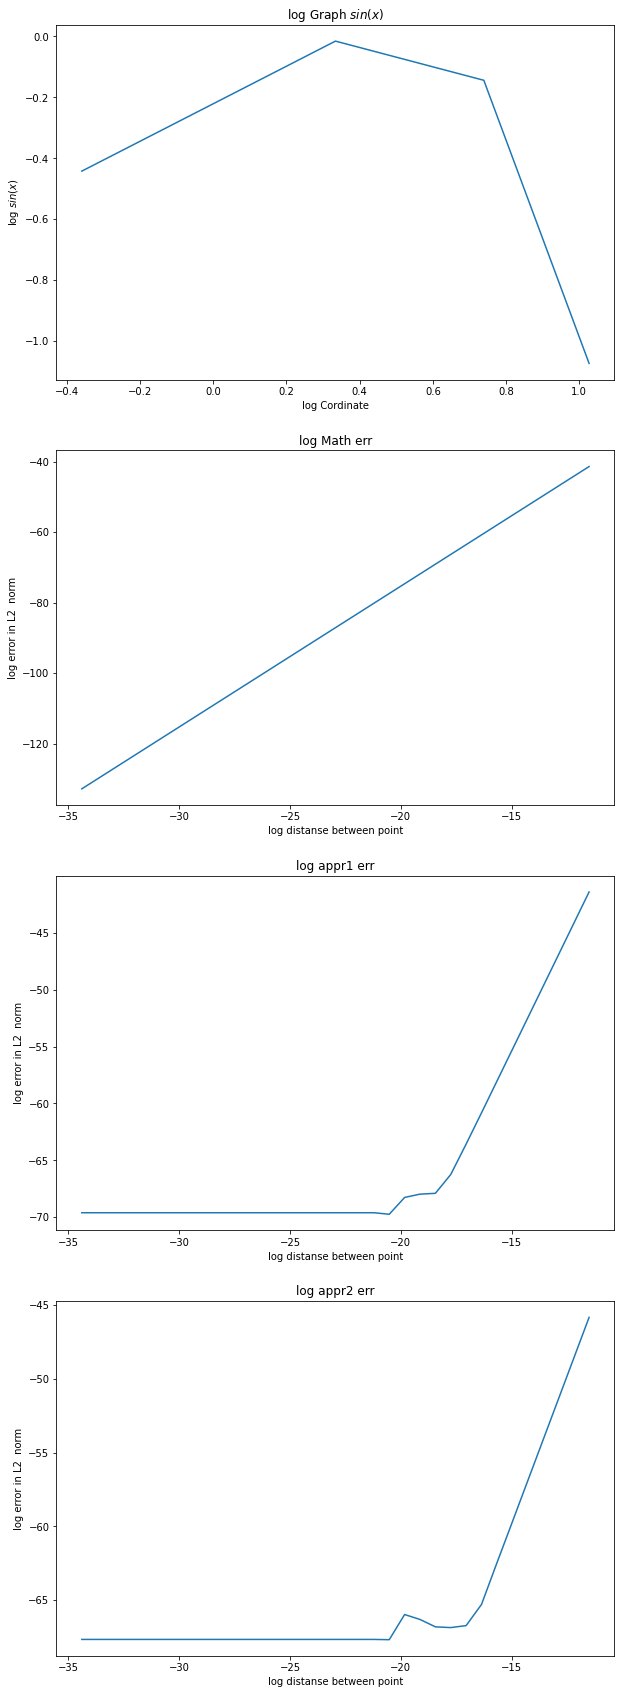

In [10]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 30))

ax[0].set_xlabel("log Cordinate")
ax[1].set_xlabel("log distanse between point")
ax[2].set_xlabel("log distanse between point")
ax[3].set_xlabel("log distanse between point")

ax[0].set_ylabel("log $sin(x)$")
ax[1].set_ylabel("log error in L2  norm")
ax[2].set_ylabel("log error in L2  norm")
ax[3].set_ylabel("log error in L2  norm")

ax[0].set_title("log Graph $sin(x)$")
ax[1].set_title("log Math err")
ax[2].set_title("log appr1 err")
ax[3].set_title("log appr2 err")

ax[0].plot(np.log(func_x), np.log(func_y))
ax[1].plot(np.log(arr_distanse), np.log(arr_err[:, 0]))
ax[2].plot(np.log(arr_distanse), np.log(arr_err[:, 1]))
ax[3].plot(np.log(arr_distanse), np.log(arr_err[:, 2]))